## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

## 학습데이터 로드

In [4]:
data_dir = Path('C:/Users/ekdms/input')
feature_dir = Path('C:/Users/ekdms/build/feature')
val_dir = Path('C:/Users/ekdms/build/val')
tst_dir = Path('C:/Users/ekdms/build/tst')
sub_dir = Path('C:/Users/ekdms/build/sub')

trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
sample_file = data_dir / 'sample_submission.csv'

target_col = 'class'
n_fold = 5
n_class = 3
seed = 42

In [5]:
algo_name = 'rfcv'
feature_name = 'feature2'
model_name = f'{algo_name}_{feature_name}'

feature_file = feature_dir / f'{feature_name}.csv'
p_val_file = val_dir / f'{model_name}.val.csv'
p_tst_file = tst_dir / f'{model_name}.tst.csv'
sub_file = sub_dir / f'{model_name}.csv'

In [6]:
df = pd.read_csv(feature_file, index_col=0)
print(df.shape)
df.head()

(400000, 59)


,z,redshift,dered_u,dered_g,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ug,d_dered_ur,d_dered_ui,d_dered_uz,d_dered_gu,d_dered_gr,d_dered_gi,d_dered_gz,d_dered_ru,d_dered_rz,d_dered_iu,d_dered_ig,d_dered_ir,d_dered_iz,d_dered_zu,d_dered_zg,d_dered_zr,d_dered_zi,d_obs_det,s_red_dered_u,s_red_dered_g,s_red_dered_r,s_red_dered_i,m_red_dered_u,m_red_dered_g,m_red_dered_r,m_red_dered_i,m_red_dered_z,v_red_dered_u,v_red_dered_g,v_red_dered_r,v_red_dered_i,v_red_dered_z,d_red_dered_u,d_red_dered_g,d_red_dered_r,d_red_dered_i,d_red_dered_z,s_ddir_ddgr,s_ddir_ddiz,s_ddgr_ddgi,s_ddgr_ddgu,s_ddug_ddzi,s_ddir_ddug,s_ddir_ddgu,m_red_airmass_u
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,16.9396,-8.1086e-05,23.1243,20.2578,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,2.8665,4.1691,5.4921,6.2153,-2.8665,1.3027,2.6257,3.3488,-4.1691,2.0462,-5.4921,-2.6257,-1.3230,0.7232,-6.2153,-3.3488,-2.0462,-0.7232,-15.0556,23.1242,20.2577,18.9550,16.9089,-0.0019,-0.0016,-0.0015,-0.0014,-0.0014,-3.5065e-06,-4.0027e-06,-4.2778e-06,-4.5988e-06,-4.7955e-06,-23.1243,-20.2579,-18.9552,-17.6322,-16.9090,-0.0203,-0.5998,3.9283,-1.5638,2.1433,1.5435,-4.1895,-9.6474e-05
1,13.1689,4.5061e-03,14.9664,14.0045,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,0.9619,1.5550,1.7302,1.8317,-0.9619,0.5931,0.7683,0.8698,-1.5550,0.2767,-1.7302,-0.7683,-0.1751,0.1016,-1.8317,-0.8698,-0.2767,-0.1016,-0.3069,14.9709,14.0090,13.4159,13.1392,0.0674,0.0631,0.0604,0.0596,0.0592,3.0108e-04,3.2176e-04,3.3599e-04,3.4043e-04,3.4307e-04,-14.9619,-14.0000,-13.4069,-13.2317,-13.1302,0.4180,-0.0736,1.3614,-0.3688,0.8603,0.7868,-1.1370,5.6472e-03
2,15.3500,4.7198e-04,16.6076,15.6866,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,0.9211,1.1676,1.2859,1.3116,-0.9211,0.2466,0.3649,0.3905,-1.1676,0.1440,-1.2859,-0.3649,-0.1183,0.0257,-1.3116,-0.3905,-0.1440,-0.0257,-0.9014,16.6081,15.6871,15.4405,15.2966,0.0078,0.0074,0.0073,0.0072,0.0072,2.8419e-05,3.0088e-05,3.0568e-05,3.0804e-05,3.0856e-05,-16.6072,-15.6861,-15.4396,-15.3213,-15.2956,0.1282,-0.0927,0.6114,-0.6745,0.8954,0.8027,-1.0394,4.8260e-04
3,19.6346,5.8143e-06,25.3536,20.9947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,4.3590,5.2664,5.5590,5.7985,-4.3590,0.9074,1.2000,1.4395,-5.2664,0.5321,-5.5590,-1.2000,-0.2926,0.2395,-5.7985,-1.4395,-0.5321,-0.2395,-1.3906,25.3537,20.9947,20.0873,19.5552,0.0001,0.0001,0.0001,0.0001,0.0001,2.2933e-07,2.7694e-07,2.8945e-07,2.9373e-07,2.9733e-07,-25.3536,-20.9946,-20.0873,-19.7946,-19.5552,0.6148,-0.0531,2.1074,-3.4516,4.1195,4.0664,-4.6516,7.0085e-06
4,17.9826,-3.3247e-05,23.7714,20.4338,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,3.3376,4.9084,5.5811,5.8955,-3.3376,1.5709,2.2436,2.5579,-4.9084,0.9871,-5.5811,-2.2436,-0.6727,0.3144,-5.8955,-2.5579,-0.9871,-0.3144,-9.3609,23.7714,20.4338,18.8630,17.8759,-0.0008,-0.0007,-0.0006,-0.0006,-0.0006,-1.3986e-06,-1.6271e-06,-1.7626e-06,-1.8277e-06,-1.8599e-06,-23.7714,-20.4339,-18.8630,-18.1903,-17.8760,0.8981,-0.3583,3.8144,-1.7667,3.0232,2.6649,-4.0103,-3.9695e-05


In [7]:
y = df[target_col].values[:320000]
df.drop(target_col, axis=1, inplace=True)
trn = df.iloc[:320000].values
tst = df.iloc[320000:].values
feature_name = df.columns.tolist()
print(y.shape, trn.shape, tst.shape)

(320000,) (320000, 58) (80000, 58)


## Stratified K-Fold Cross Validation

In [8]:
cv = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

## Random Forest 모델 학습

In [9]:
p_val = np.zeros((trn.shape[0], n_class))
p_tst = np.zeros((tst.shape[0], n_class))
for i, (i_trn, i_val) in enumerate(cv.split(trn, y), 1):
    print(f'training model for CV #{i}')
    clf = RandomForestClassifier(n_estimators=100,
                                 min_samples_leaf=10,
                                 max_features='auto',
                                 max_samples=.5,
                                 random_state=seed,
                                 n_jobs=-1)
    clf.fit(trn[i_trn], y[i_trn])
    p_val[i_val, :] = clf.predict_proba(trn[i_val])
    p_tst += clf.predict_proba(tst) / n_fold

training model for CV #1
training model for CV #2
training model for CV #3
training model for CV #4
training model for CV #5


In [10]:
print(f'{accuracy_score(y, np.argmax(p_val, axis=1)) * 100:.4f}%')

93.4403%


In [11]:
print(p_val.shape, p_tst.shape)

(320000, 3) (80000, 3)


In [12]:
np.savetxt(p_val_file, p_val, fmt='%.6f', delimiter=',')
np.savetxt(p_tst_file, p_tst, fmt='%.6f', delimiter=',')

## 피처 중요도 시각화

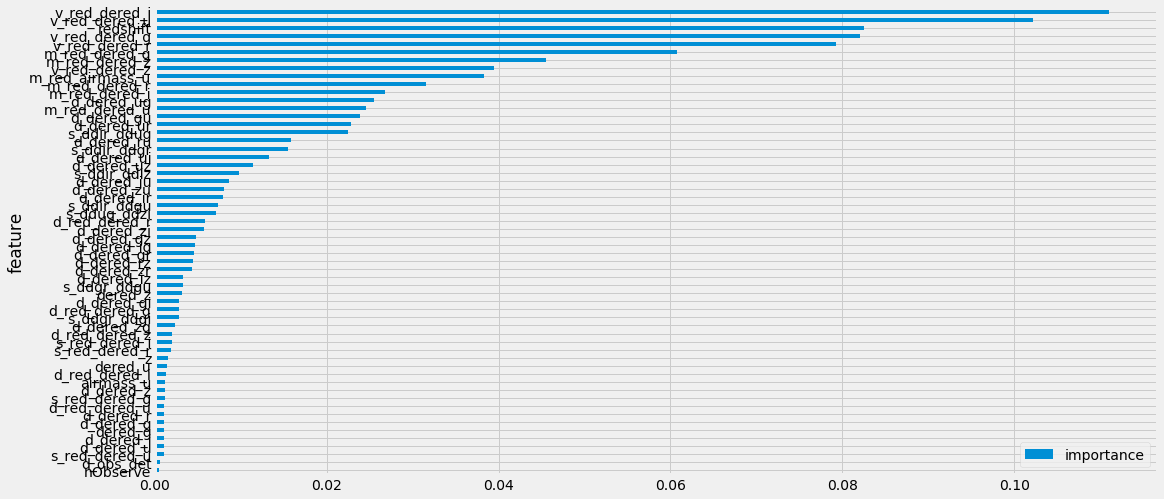

In [13]:
imp = pd.DataFrame({'feature': df.columns, 'importance': clf.feature_importances_})
imp = imp.sort_values('importance').set_index('feature')
imp.plot(kind='barh')

## 제출 파일 생성 

In [14]:
sub = pd.read_csv(sample_file, index_col=0)
print(sub.shape)
sub.head()

(80000, 1)


,class
id,
320000,0
320001,0
320002,0
320003,0
320004,0


In [15]:
sub[target_col] = np.argmax(p_tst, axis=1)
sub.head()

,class
id,
320000,2
320001,0
320002,2
320003,0
320004,2


In [16]:
sub[target_col].value_counts()

2    41128
0    29941
1     8931
Name: class, dtype: int64

In [17]:
sub.to_csv(sub_file)